# Sales Predictions - EDA

## Imports

In [1]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Custom Functions

In [2]:
#Univariate plots for EDA
def explore_categorical(df, x, fillna = True, placeholder = 'MISSING',
                        figsize = (6,4), order = None):
  """Creates a seaborn countplot with the option to temporarily fill missing values
  Prints statements about null values, cardinality, and checks for
  constant/quasi-constant features.
  Source:{PASTE IN FINAL LESSON LINK}
  """
  # Make a copy of the dataframe and fillna
  temp_df = df.copy()
  # Before filling nulls, save null value counts and percent for printing
  null_count = temp_df[x].isna().sum()
  null_perc = null_count/len(temp_df)* 100
  # fillna with placeholder
  if fillna == True:
    temp_df[x] = temp_df[x].fillna(placeholder)
  # Create figure with desired figsize
  fig, ax = plt.subplots(figsize=figsize)
  # Plotting a count plot
  sns.countplot(data=temp_df, x=x, ax=ax, order=order)
  # Rotate Tick Labels for long names
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
  # Add a title with the feature name included
  ax.set_title(f"Column: {x}", fontweight='bold')

  # Fix layout and show plot (before print statements)
  fig.tight_layout()
  plt.show()

  # Print null value info
  print(f"- NaN's Found: {null_count} ({round(null_perc,2)}%)")
  # Print cardinality info
  nunique = temp_df[x].nunique()
  print(f"- Unique Values: {nunique}")

  # First find value counts of feature
  val_counts = temp_df[x].value_counts(dropna=False)
  # Define the most common value
  most_common_val = val_counts.index[0]
  # Define the frequency of the most common value
  freq = val_counts.values[0]
  # Calculate the percentage of the most common value
  perc_most_common = freq / len(temp_df) * 100

  # Print the results
  print(f"- Most common value: '{most_common_val}' occurs {freq} times ({round(perc_most_common,2)}%)")
  # print message if quasi-constant or constant (most common val more than 98% of data)
  if perc_most_common > 98:
    print(f"\n- [!] Warning: '{x}' is a constant or quasi-constant feature and should be dropped.")
  else:
    print("- Not constant or quasi-constant.")
  return fig, ax


def explore_numeric(df, x, figsize=(6,5) ):
  """Creates a seaborn histplot and boxplot with a share x-axis,
  Prints statements about null values, cardinality, and checks for
  constant/quasi-constant features.
  Source:{PASTE IN FINAL LESSON LINK}
  """

  ## Save null value counts and percent for printing
  null_count = df[x].isna().sum()
  null_perc = null_count/len(df)* 100


  ## Making our figure with gridspec for subplots
  gridspec = {'height_ratios':[0.7,0.3]}
  fig, axes = plt.subplots(nrows=2, figsize=figsize,
                           sharex=True, gridspec_kw=gridspec)
  # Histogram on Top
  sns.histplot(data=df, x=x, ax=axes[0])

  # Boxplot on Bottom
  sns.boxplot(data=df, x=x, ax=axes[1])

  ## Adding a title
  axes[0].set_title(f"Column: {x}", fontweight='bold')

  ## Adjusting subplots to best fill Figure
  fig.tight_layout()

  # Ensure plot is shown before message
  plt.show()


  # Print null value info
  print(f"- NaN's Found: {null_count} ({round(null_perc,2)}%)")
  # Print cardinality info
  nunique = df[x].nunique()
  print(f"- Unique Values: {nunique}")


  # Get the most most common value, its count as # and as %
  most_common_val_count = df[x].value_counts(dropna=False).head(1)
  most_common_val = most_common_val_count.index[0]
  freq = most_common_val_count.values[0]
  perc_most_common = freq / len(df) * 100

  print(f"- Most common value: '{most_common_val}' occurs {freq} times ({round(perc_most_common,2)}%)")

  # print message if quasi-constant or constant (most common val more than 98% of data)
  if perc_most_common > 98:
    print(f"\n- [!] Warning: '{x}' is a constant or quasi-constant feature and should be dropped.")
  else:
    print("- Not constant or quasi-constant.")
  return fig, axes

In [3]:
#Multivariate plots for EDA
def plot_categorical_vs_target(df, x, y='Item_Outlet_Sales',figsize=(6,4),
                            fillna = True, placeholder = 'MISSING',
                            order = None):
  """Plots a combination of a seaborn barplot of means combined with
  a seaborn stripplot to show the spread of the data.
  Source:{PASTE IN FINAL LESSON LINK}
  """
  # Make a copy of the dataframe and fillna
  temp_df = df.copy()
  # fillna with placeholder
  if fillna == True:
    temp_df[x] = temp_df[x].fillna(placeholder)

  # or drop nulls prevent unwanted 'nan' group in stripplot
  else:
    temp_df = temp_df.dropna(subset=[x])
  # Create the figure and subplots
  fig, ax = plt.subplots(figsize=figsize)

    # Barplot
  sns.barplot(data=temp_df, x=x, y=y, ax=ax, order=order, alpha=0.6,
              linewidth=1, edgecolor='black', errorbar=None)

  # Boxplot
  sns.stripplot(data=temp_df, x=x, y=y, hue=x, ax=ax,
                order=order, hue_order=order, legend=False,
                edgecolor='white', linewidth=0.5,
                size=3,zorder=0)
  # Rotate xlabels
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

  # Add a title
  ax.set_title(f"{x} vs. {y}", fontweight='bold')
  fig.tight_layout()
  return fig, ax


def plot_numeric_vs_target(df, x, y='Item_Outlet_Sales',
                           figsize=(6,4)):
  """Plots a seaborn regplot with Pearson's correlation (r) added
  to the title.
  Source:{PASTE IN FINAL LESSON LINK}
  """
  # Calculate the correlation
  corr = df[[x,y]].corr().round(2)
  r = corr.loc[x,y]

  # Plot the data
  fig, ax = plt.subplots(figsize=figsize)
  scatter_kws={'ec':'white','lw':1,'alpha':0.8}
  sns.regplot(data=df, x=x, y=y, ax=ax, scatter_kws=scatter_kws)

  ## Add the title with the correlation
  ax.set_title(f"{x} vs. {y} (r = {r})", fontweight='bold')

  # Make sure the plot is shown before the print statement
  plt.show()

  return fig, ax

## Load Data

In [4]:
#Load in csv data
df = pd.read_csv('Data/sales_predictions_2023.csv')

In [5]:
#Preview first 5 rows
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [6]:
#Preview dataframe info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [7]:
#Describe df shape
print(f'There are {df.shape[0]} rows and {df.shape[1]} columns.')

There are 8523 rows and 12 columns.


In [8]:
#Check summary statistics of numeric columns
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [9]:
#Check summary statistics of string columns
df.describe(exclude = 'number')

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
count,8523,8523,8523,8523,6113,8523,8523
unique,1559,5,16,10,3,3,4
top,FDW13,Low Fat,Fruits and Vegetables,OUT027,Medium,Tier 3,Supermarket Type1
freq,10,5089,1232,935,2793,3350,5577


## Clean Data

### Remove Duplicates

In [10]:
#Check for duplicate data
print(f'There are {df.duplicated().sum()} duplicates.')

There are 0 duplicates.


- There are no duplicate values to remove.

### Identify Missing Values

In [11]:
#Idenfity missing values
df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

- There are missing values for item weight and outlet size.

In [12]:
#Explore item weight statistics to determine fill value
df['Item_Weight'].describe()

count    7060.000000
mean       12.857645
std         4.643456
min         4.555000
25%         8.773750
50%        12.600000
75%        16.850000
max        21.350000
Name: Item_Weight, dtype: float64

- Because there is not a significant difference between the mean and median values, this suggests that there are no outliers for item weight, and either value will be acceptable to fill the missing values. I will impute the median value of 12.6 into the missing values.

In [13]:
#Fill null values with the median
df['Item_Weight'] = df['Item_Weight'].fillna(12.6)
#Verify the values were filled
df['Item_Weight'].isna().sum()

0

- For outlet size, I will replace the missing values with a placeholder, 'Missing'.

In [14]:
#Fill null values in Outlet_Size column
df['Outlet_Size'] = df['Outlet_Size'].fillna("MISSING")
#Verify the values were filled
df['Outlet_Size'].isna().sum()

0

In [15]:
#Verify all missing values are filled
df.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

- All missing values have been imputed.

### Fix Inconsistencies

In [16]:
#Save a list of categorical variables
cat_cols = df.select_dtypes('object').columns

#Loop through each column and examine values
for col in cat_cols:
    print(f'Value Counts for {col}')
    print(df[col].value_counts())
    #Print empty line for readability
    print('\n')

Value Counts for Item_Identifier
FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: Item_Identifier, Length: 1559, dtype: int64


Value Counts for Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64


Value Counts for Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64


Value Counts for Outlet_Identifier
OUT027    935
OUT013    932
OUT049    930
OUT046    930


- There are inconsistent values in the fat content column. There should only be two values: Regular and Low Fat.
- I will also change the value 'High' in outlet size to 'Large' to better fit the other values.

In [17]:
#Change inconsistent values in each column
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace({'LF': 'Low Fat', 
                                                         'low fat': 'Low Fat', 
                                                         'reg': 'Regular'})
df['Outlet_Size'] = df['Outlet_Size'].replace({'High': 'Large'})
#Verify the values
print(df['Item_Fat_Content'].value_counts())
print('\n')
print(df['Outlet_Size'].value_counts())

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64


Medium     2793
MISSING    2410
Small      2388
Large       932
Name: Outlet_Size, dtype: int64


- All inconsistencies have been replaced.

### Check impossible values

In [18]:
#Check summary statistics for impossible values
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.00000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.81342,0.066132,140.992782,1997.831867,2181.288914
std,4.22724,0.051598,62.275067,8.371760,1706.499616
min,4.55500,0.000000,31.290000,1985.000000,33.290000
25%,9.31000,0.026989,93.826500,1987.000000,834.247400
50%,12.60000,0.053931,143.012800,1999.000000,1794.331000
75%,16.00000,0.094585,185.643700,2004.000000,3101.296400
max,21.35000,0.328391,266.888400,2009.000000,13086.964800


- There are larger sales values, but these are not likely to be impossible values. I will not explore these further, as these values also will be important for machine learning predictions.

## Feature Inspection

### Item Identifier

- Item_Identifier: Product ID

In [21]:
#Determine data type
df['Item_Identifier'].dtype

dtype('O')

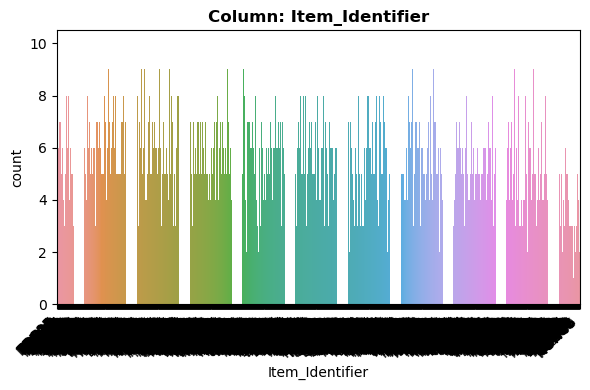

- NaN's Found: 0 (0.0%)
- Unique Values: 1559
- Most common value: 'FDW13' occurs 10 times (0.12%)
- Not constant or quasi-constant.


In [22]:
#Call univariate function
explore_categorical(df, x = 'Item_Identifier');

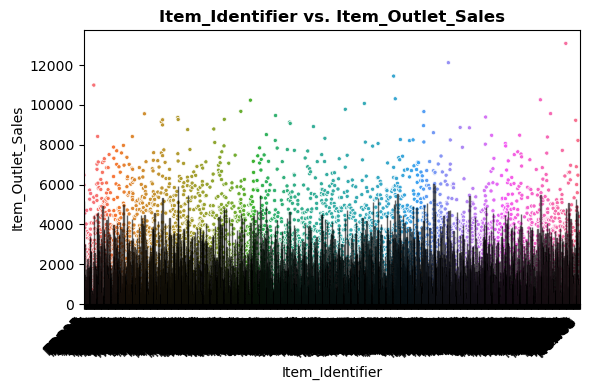

In [23]:
#Call multivariate function
plot_categorical_vs_target(df, x = 'Item_Identifier');

- This feature is categorical, and has over 1,500 unique values. This feature will need to be dropped prior to machine learning, as it has such high cardinality. 

### Item Weight

- Item_Weight: Weight of product

In [24]:
#Determine data type
df['Item_Weight'].dtype

dtype('float64')

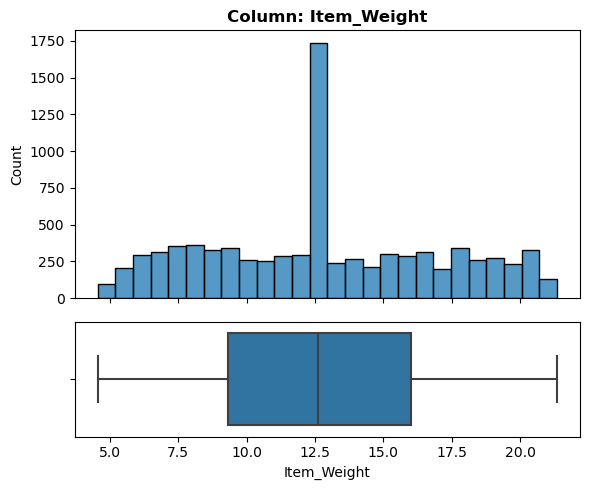

- NaN's Found: 0 (0.0%)
- Unique Values: 415
- Most common value: '12.6' occurs 1516 times (17.79%)
- Not constant or quasi-constant.


In [25]:
#Call univariate function
explore_numeric(df, 'Item_Weight');

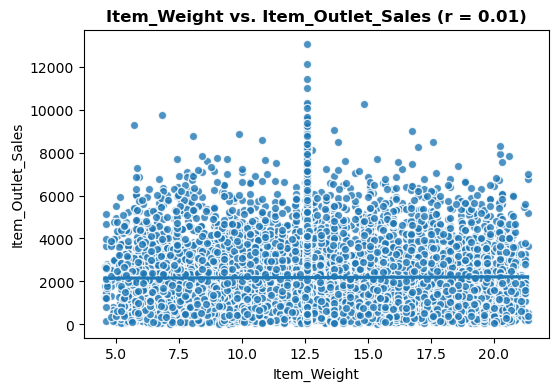

In [26]:
#Call multivariate function
plot_numeric_vs_target(df, 'Item_Weight');

- This is a numeric feature, with very low correlation to the target. This feature may or may not be included for regression models.

### Item Fat Content

- Item_Fat_Content: Whether the product is low-fat or regular

In [27]:
#Determine data type
df['Item_Fat_Content'].dtype

dtype('O')

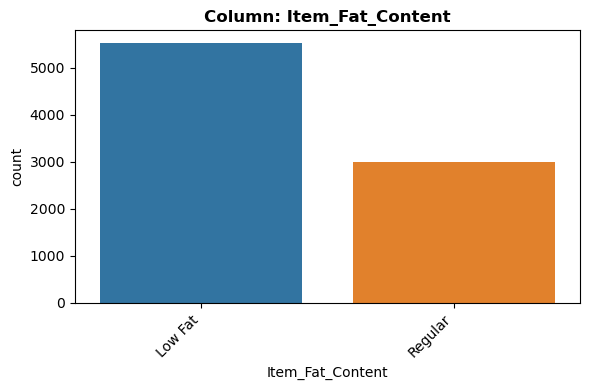

- NaN's Found: 0 (0.0%)
- Unique Values: 2
- Most common value: 'Low Fat' occurs 5517 times (64.73%)
- Not constant or quasi-constant.


In [28]:
#Call univariate function
explore_categorical(df, 'Item_Fat_Content');

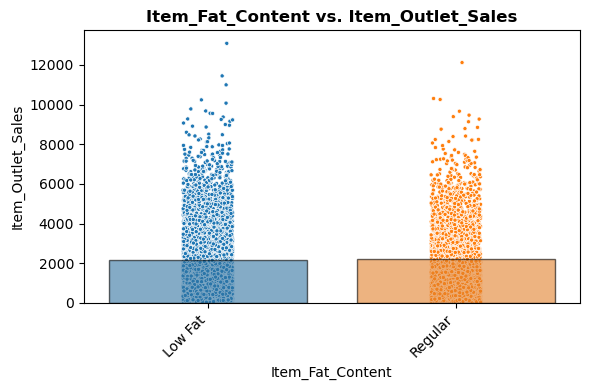

In [29]:
#Call multivariate function
plot_categorical_vs_target(df, x = 'Item_Fat_Content');

- This categorical feature has low cardinality, and while it shows a large spread of sales values between the two categories, the average sales is about the same. This does not show large prediction power, so it can either be included or not for modeling.

### Item Visibility

- Item_Visibility: The percentage of total display area of all products in a store allocated to the particular product

In [30]:
#Determine data type
df['Item_Visibility'].dtype

dtype('float64')

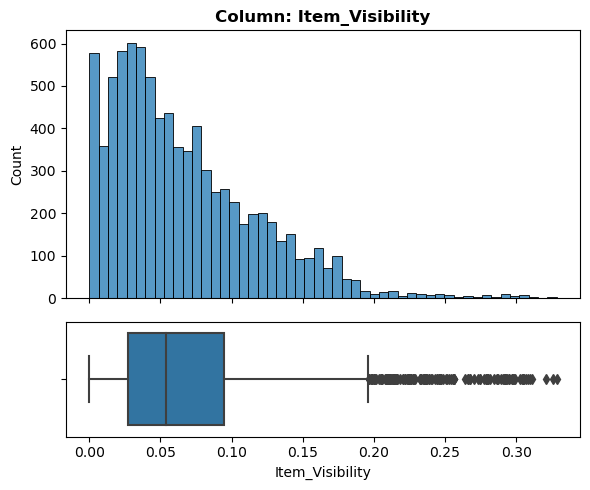

- NaN's Found: 0 (0.0%)
- Unique Values: 7880
- Most common value: '0.0' occurs 526 times (6.17%)
- Not constant or quasi-constant.


In [31]:
#Call univariate function
explore_numeric(df, 'Item_Visibility');

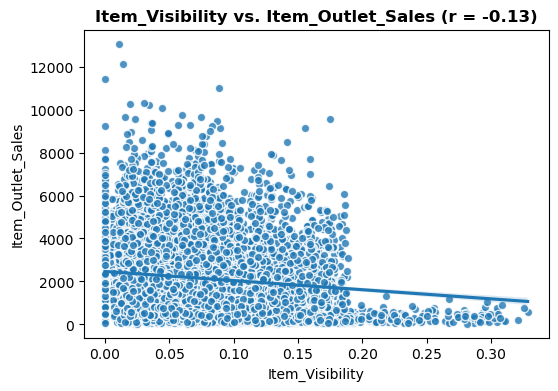

In [32]:
#Call multivariate function
plot_numeric_vs_target(df, x = 'Item_Visibility');

- This is a numeric feature, with a slight negative correlation to the target. This is surprising, as I would have expected items that are more visible to be sold more. This feature also has some outliers that may need to be removed prior to modeling.

### Item Type

- Item_Type: The category to which the product belongs

In [33]:
#Determine data type
df['Item_Type'].dtype

dtype('O')

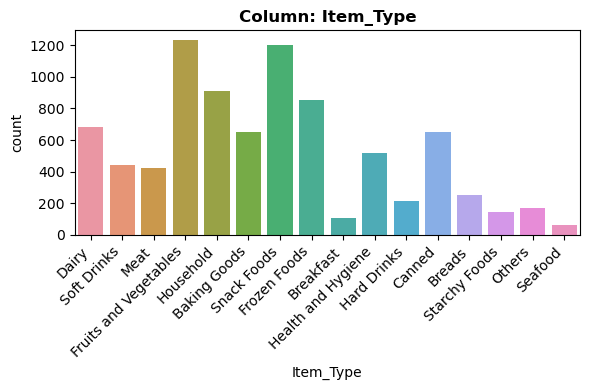

- NaN's Found: 0 (0.0%)
- Unique Values: 16
- Most common value: 'Fruits and Vegetables' occurs 1232 times (14.46%)
- Not constant or quasi-constant.


In [34]:
#Call univariate function
explore_categorical(df, 'Item_Type');

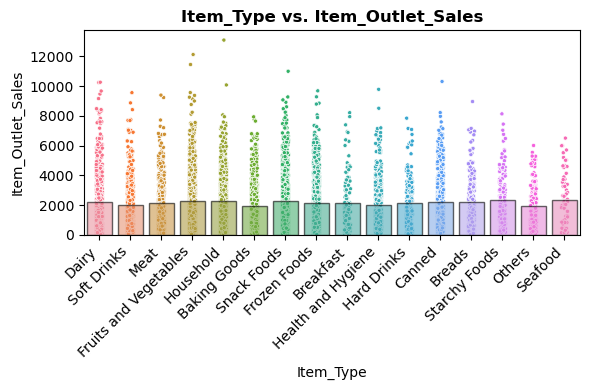

In [35]:
#Call multivariate function
plot_categorical_vs_target(df, 'Item_Type');

- This categorical feature has a 16 categories of items, which is more than a traditional cut-off of 10 for high cardinality. However, it has a variable spread of values for average sales per category, and shows that some item types, such as household items, can sell for more money. This is an important feature for predicting sales.

### Item MRP

- Item_MRP: Maximum Retail Price (list price) of the product

In [36]:
#Determine data type
df['Item_MRP'].dtype

dtype('float64')

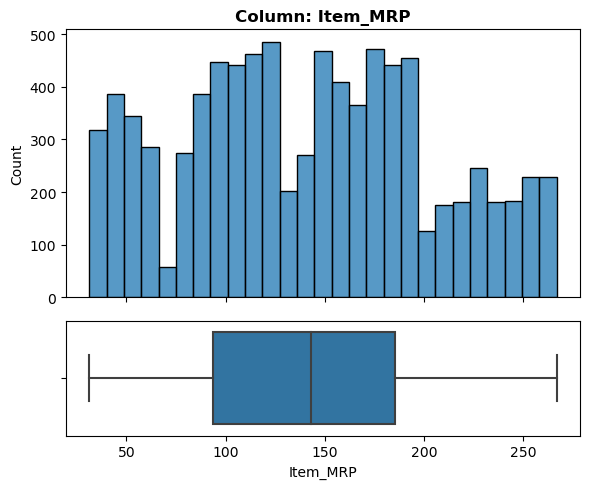

- NaN's Found: 0 (0.0%)
- Unique Values: 5938
- Most common value: '172.0422' occurs 7 times (0.08%)
- Not constant or quasi-constant.


In [37]:
#Call univariate function
explore_numeric(df, x = 'Item_MRP');

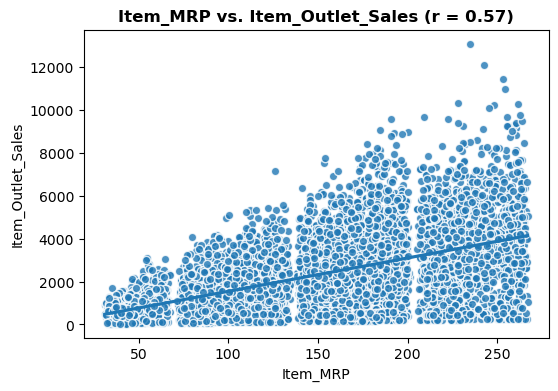

In [38]:
#Call multivariate function
plot_numeric_vs_target(df, x = 'Item_MRP');

- This numeric feature has a moderate positive correlation with the target. This shows that as the maximum retail price of the item goes up, so do sales. This is an important predictor for the target.

### Outlet Identifier

- Outlet_Identifier: Store ID

In [39]:
#Determine data type
df['Outlet_Identifier'].dtype

dtype('O')

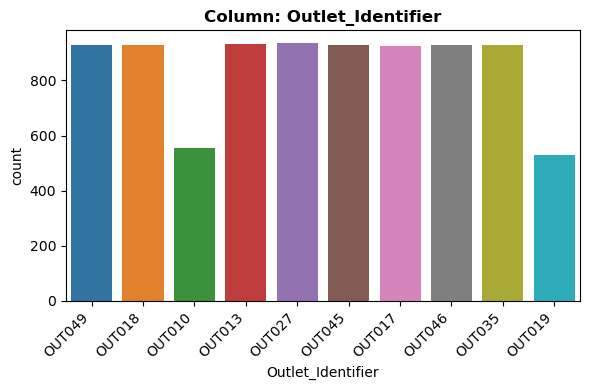

- NaN's Found: 0 (0.0%)
- Unique Values: 10
- Most common value: 'OUT027' occurs 935 times (10.97%)
- Not constant or quasi-constant.


In [40]:
#Call univariate function
explore_categorical(df, x = 'Outlet_Identifier');

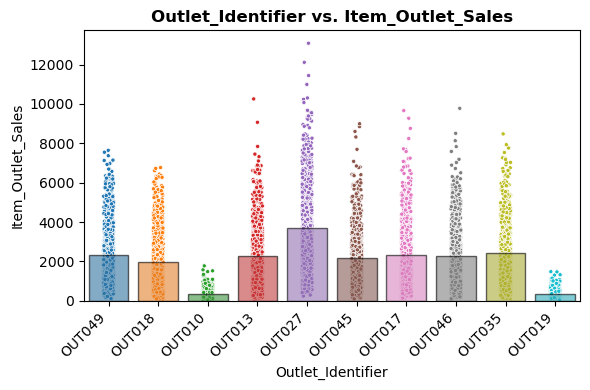

In [41]:
#Call multivariate function
plot_categorical_vs_target(df, x = 'Outlet_Identifier');

- This categorical variable shows that stores with certain identifiers so sell more than others. This could be an important feature for predicting sales.

### Outlet Establishment Year

- Outlet_Establishment_Year: The year in which store was established

In [42]:
#Determine data type
df['Outlet_Establishment_Year'].dtype

dtype('int64')

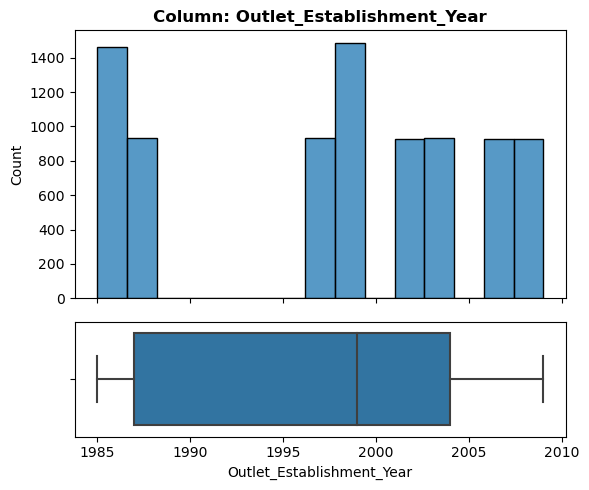

- NaN's Found: 0 (0.0%)
- Unique Values: 9
- Most common value: '1985' occurs 1463 times (17.17%)
- Not constant or quasi-constant.


In [43]:
#Call univariate function
explore_numeric(df, 'Outlet_Establishment_Year');

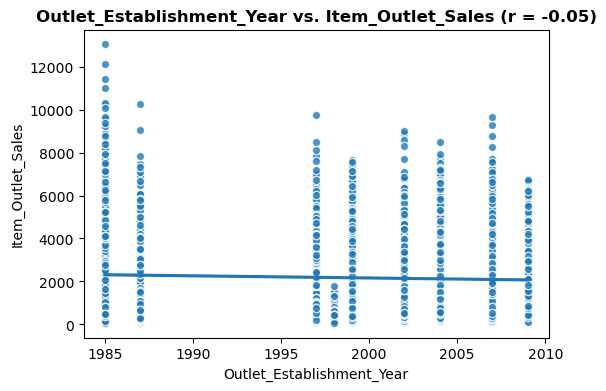

In [44]:
#Call multivariate function
plot_numeric_vs_target(df, 'Outlet_Establishment_Year');

- This discrete numeric feature has very little correlation with the target. This feature can likely be dropped for modeling.

### Outlet Size

- Outlet_Size: The size of the store in terms of ground area covered

In [45]:
#Determine data type
df['Outlet_Size'].dtype

dtype('O')

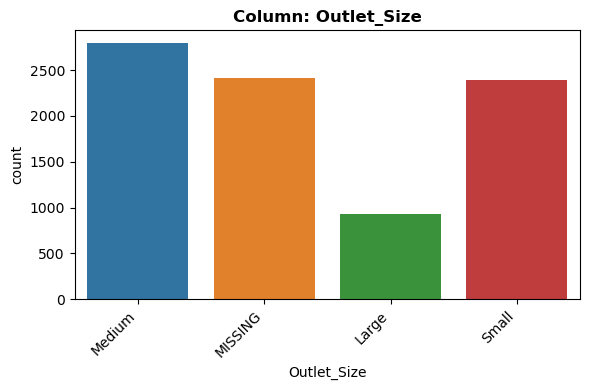

- NaN's Found: 0 (0.0%)
- Unique Values: 4
- Most common value: 'Medium' occurs 2793 times (32.77%)
- Not constant or quasi-constant.


In [46]:
#Call univariate function
explore_categorical(df, x = 'Outlet_Size');

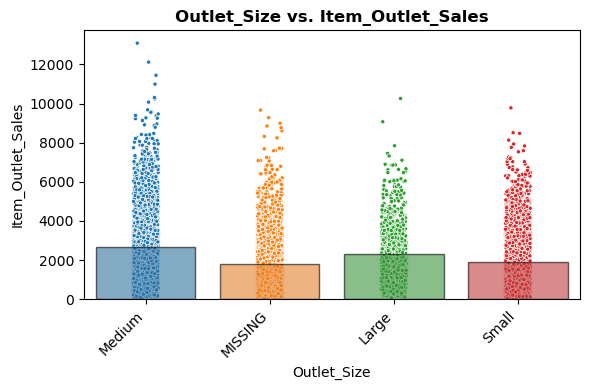

In [47]:
#Call multivariate function
plot_categorical_vs_target(df, x = 'Outlet_Size');

- This categorical variable shows some variability between outlet sizes in terms of sales. Medium sized stores tend to have the highest average sales. 

### Outlet Location Type

- Outlet_Location_Type: The type of area in which the store is located

In [48]:
#Determine data type
df['Outlet_Location_Type'].dtype

dtype('O')

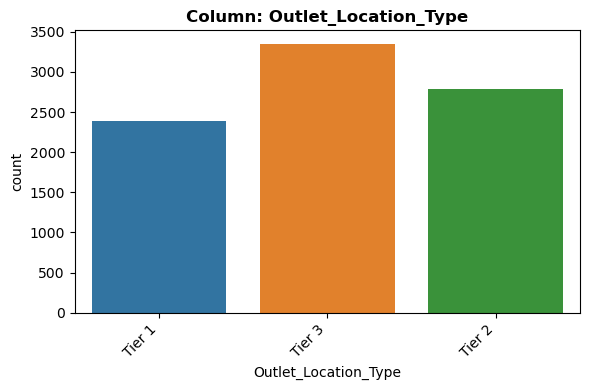

- NaN's Found: 0 (0.0%)
- Unique Values: 3
- Most common value: 'Tier 3' occurs 3350 times (39.31%)
- Not constant or quasi-constant.


In [49]:
#Call univariate function
explore_categorical(df, x = 'Outlet_Location_Type');

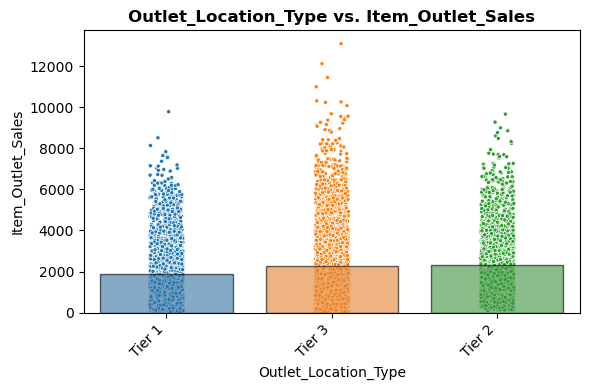

In [50]:
#Call multivariate function
plot_categorical_vs_target(df, x = 'Outlet_Location_Type');

- This categorical feature shows that Tier 3 type locations can have much higher sales than the other two types.

### Outlet Type

- Outlet_Type: Whether the outlet is a grocery store or some sort of supermarket

In [51]:
#Determine data type
df['Outlet_Type'].dtype

dtype('O')

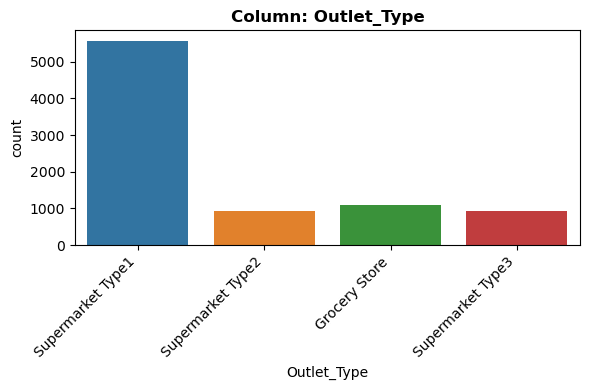

- NaN's Found: 0 (0.0%)
- Unique Values: 4
- Most common value: 'Supermarket Type1' occurs 5577 times (65.43%)
- Not constant or quasi-constant.


In [52]:
#Call univariate function
explore_categorical(df, x = 'Outlet_Type');

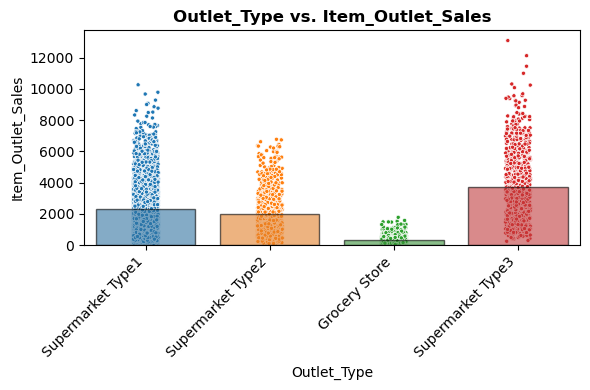

In [53]:
#Call multivariate function
plot_categorical_vs_target(df, x = 'Outlet_Type');

- Even though there are more Supermarket Type 1 stores, Supermarket Type 3 stores tend to have higher average sales, as well as the highest potential sales of the 4 types of stores.

### Item Outlet Sales

- Item_Outlet_Sales: Sales of the product in the particular store.

**This is the target variable to be predicted.**

In [55]:
#Determine data type
df['Item_Outlet_Sales'].dtype

dtype('float64')

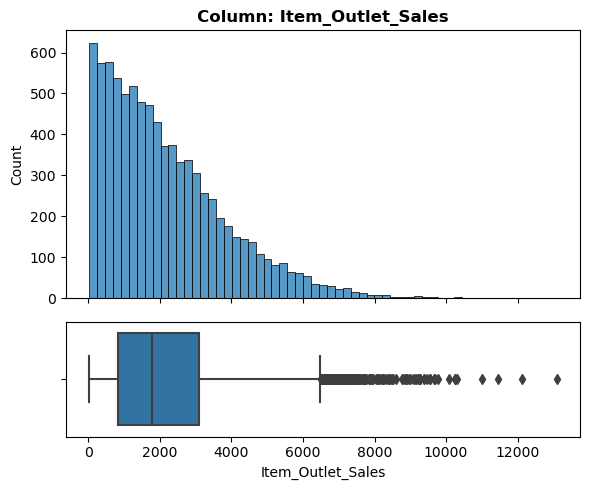

- NaN's Found: 0 (0.0%)
- Unique Values: 3493
- Most common value: '958.752' occurs 17 times (0.2%)
- Not constant or quasi-constant.


In [56]:
#Call univariate function
explore_numeric(df, x = 'Item_Outlet_Sales');

- This is the target feature for predictions. It is positively skewed, with several outliers.